# Impfungen in Deutschland

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.facecolor'] = 'white'

## Aktuelle Daten des RKI

In [2]:
url = "https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Landkreise_COVID-19-Impfungen.csv"
data = pd.read_csv(url, sep=",")

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,Impfdatum,LandkreisId_Impfort,Altersgruppe,Impfschutz,Anzahl
0,2020-12-27,1003,18-59,1,9
1,2020-12-27,1003,60+,1,19
2,2020-12-27,1053,18-59,1,13
3,2020-12-27,1053,60+,1,200
4,2020-12-27,1055,18-59,1,20
...,...,...,...,...,...
725739,2022-01-11,u,18-59,1,25
725740,2022-01-11,u,18-59,2,55
725741,2022-01-11,u,18-59,3,773
725742,2022-01-11,u,60+,2,6


In [4]:
agg = pd.pivot_table(data, values="Anzahl", index=["Impfdatum","Altersgruppe"], columns="Impfschutz", aggfunc=np.sum)
agg_avg = agg.loc[agg.index.levels[0][-7:]].mean(level=[1])

In [5]:
plt.rc('font', family='DejaVu Sans')

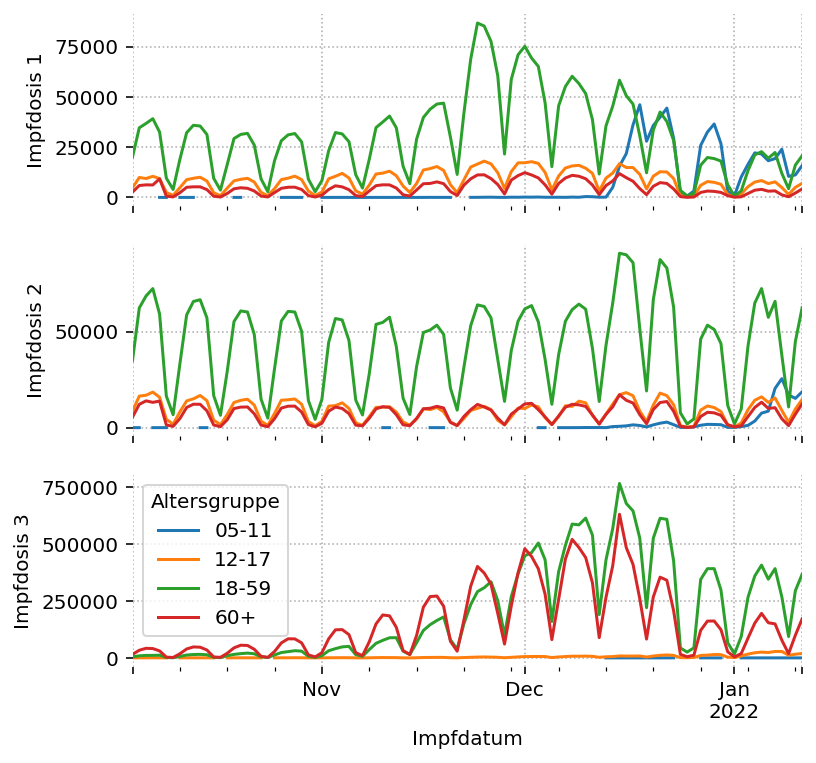

In [6]:
fig, ax = plt.subplots(3,1, sharex=True,  figsize=(6,6))
ax = ax.flatten()
idx = pd.IndexSlice
for i,j in enumerate(agg.columns):
    y = agg.loc[:,j].unstack().iloc[-100:,:]
    y.index = pd.DatetimeIndex(y.index)
    y.plot(ax=ax[i])
    ax[i].set_ylabel(f"Impfdosis {j}")
    if j < 3:
        ax[i].get_legend().remove()
    for s in ax[i].spines.values():
        s.set_visible(False)
    ax[i].grid(ls=":")
    #ax[i].set_ylabel("Dosen")
    #ax[i].set_yscale("log")


In [7]:
latest = data.loc[data.Impfdatum==data.Impfdatum.values[-1],:]
#agg = pd.pivot_table(latest, values="Anzahl", index="Altersgruppe", columns="Impfschutz", aggfunc=np.sum)

Text(0.5, 0, 'Altersgruppe')

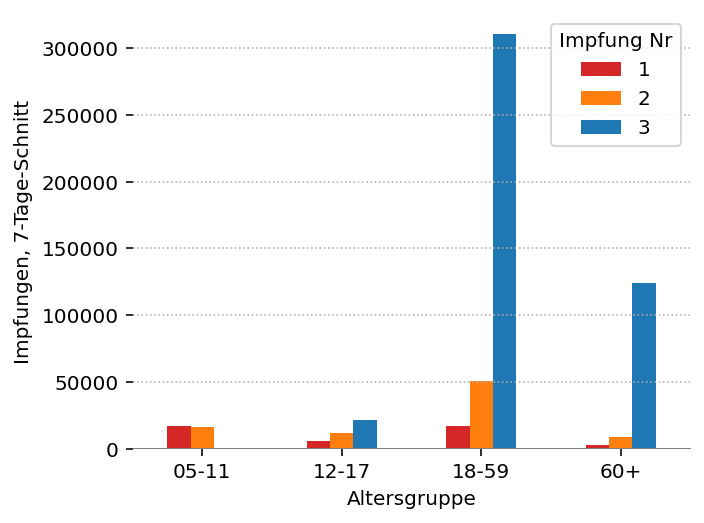

In [8]:
plt.rcParams['figure.facecolor']='white'
agg_avg.plot.bar(figsize=(5,4), color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Impfungen, 7-Tage-Schnitt")
plt.xticks(rotation=0)
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

In [9]:
(agg_avg  / agg_avg.values.sum() * 100).round(1)

Impfschutz,1,2,3
Altersgruppe,,,
05-11,3.0,2.8,0.0
12-17,1.0,2.0,3.7
18-59,2.9,8.6,53.0
60+,0.5,1.4,21.2


## Impfschutz pro Altersgruppe
VE Daten von UKHSA.
Altersspezifisches Risiko

In [10]:
hr = np.array([1e-3, 2e-3, 2e-2, 1.6e-1])
ve = np.array([0.5, 0.5-0.25, 0.25-0.08])#np.array([1-0.08, (1-0.04)*0.08, 0.99*0.2])
#ve = np.array([76.7, 83.7*(100-76.7)/100, 96.9*(100-67.6)/100])/100.
rr =  agg_avg / agg_avg * (hr.reshape(-1,1) * ve.reshape(1,-1))
hosp = agg_avg * rr

In [11]:
rr

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.0005,0.00025,0.00017
12-17,0.0010,0.00050,0.00034
18-59,0.0100,0.00500,0.00340
60+,0.0800,0.04000,0.02720


Text(0.5, 0, 'Altersgruppe')

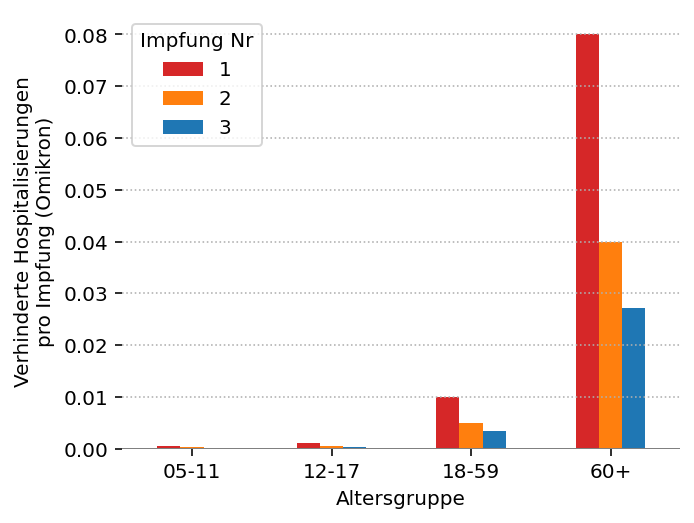

In [12]:
plt.rcParams['figure.facecolor']='white'
rr.plot.bar(figsize=(5,4),color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Verhinderte Hospitalisierungen\npro Impfung (Omikron)")
plt.xticks(rotation=0)
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

Text(0.5, 0, 'Altersgruppe')

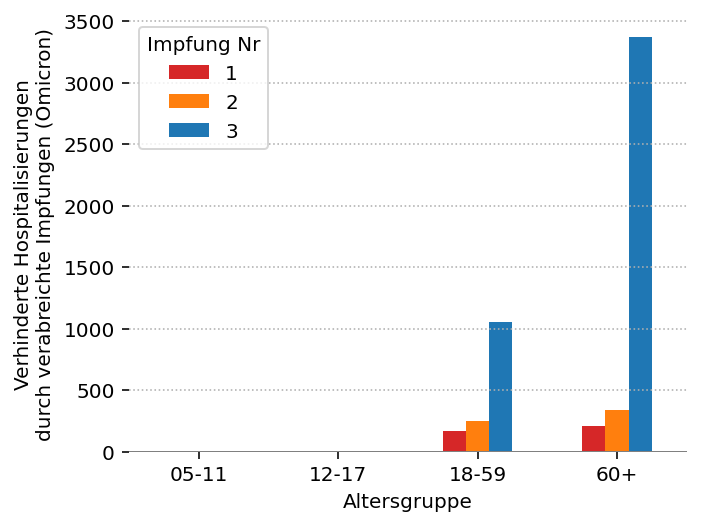

In [13]:
plt.rcParams['figure.facecolor']='white'
hosp.plot.bar(figsize=(5,4),color=['C3','C1','C0'])
date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.ylabel(f"Verhinderte Hospitalisierungen\ndurch verabreichte Impfungen (Omicron)")
plt.xticks(rotation=0)
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.axhline(0, color='gray')
plt.legend(title="Impfung Nr")
plt.xlabel("Altersgruppe")

In [14]:
hosp

Impfschutz,1,2,3
Altersgruppe,,,
05-11,8.632357,4.041464,0.006387
12-17,5.934143,5.779214,7.400440
18-59,168.507143,251.278571,1054.574600
60+,210.720000,336.085714,3367.196800


## Impfquote

In [15]:
rate = pd.read_csv("https://raw.githubusercontent.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland/master/Aktuell_Deutschland_Impfquoten_COVID-19.csv")

In [16]:
rate

,Datum,Bundesland,BundeslandId_Impfort,Impfungen_gesamt,Impfungen_gesamt_min1,Impfungen_gesamt_05bis11_min1,Impfungen_gesamt_voll,Impfungen_gesamt_boost,Impfquote_gesamt_min1,Impfquote_12bis17_min1,...,Impfquote_gesamt_voll,Impfquote_12bis17_voll,Impfquote_18plus_voll,Impfquote_18bis59_voll,Impfquote_60plus_voll,Impfquote_gesamt_boost,Impfquote_12bis17_boost,Impfquote_18plus_boost,Impfquote_18bis59_boost,Impfquote_60plus_boost
0,2022-01-11,Deutschland,0,155365945,62158449,608729,60004889,36786897,74.8,61.2,...,72.2,55.1,82.7,80.2,87.6,44.2,10.4,52.3,44.6,66.9
1,2022-01-11,Schleswig-Holstein,1,5788498,2284701,23792,2230249,1407043,78.5,76.2,...,76.6,68.1,88.4,86.4,91.9,48.3,8.6,57.1,47.5,74.2
2,2022-01-11,Hamburg,2,3559088,1481580,16273,1439613,744883,80.0,61.3,...,77.7,57.2,89.9,90.4,88.7,40.2,7.6,47.9,42.2,62.2
3,2022-01-11,Niedersachsen,3,15469915,6117001,57547,5894688,3889579,76.4,66.7,...,73.7,60.6,84.1,81.1,89.8,48.6,12.4,57.5,50.4,70.5
4,2022-01-11,Bremen,4,1454212,598767,4978,574637,328496,88.0,63.6,...,84.5,58.1,97.3,98.4,95.2,48.3,5.8,57.5,48.9,74.9
5,2022-01-11,Nordrhein-Westfalen,5,35147257,14095600,175393,13475988,8380303,78.6,67.0,...,75.2,61.3,86.0,83.8,90.3,46.8,11.5,55.4,47.2,71.3
6,2022-01-11,Hessen,6,11458955,4699445,42867,4458072,2551709,74.7,60.7,...,70.8,53.5,81.5,79.3,85.9,40.5,8.0,48.2,41.0,62.7
7,2022-01-11,Rheinland-Pfalz,7,7750235,3102902,28447,2928137,1885614,75.7,63.2,...,71.4,56.0,81.7,78.4,87.7,46.0,10.8,54.3,46.8,68.0
8,2022-01-11,Baden-Württemberg,8,20391136,8030373,73337,7825606,5011860,72.3,58.2,...,70.5,51.5,81.2,78.8,86.1,45.1,14.5,53.4,47.2,65.9
9,2022-01-11,Bayern,9,23967919,9511377,103097,9330481,5628700,72.4,62.6,...,71.0,56.7,81.2,79.1,85.6,42.8,9.6,50.7,42.7,67.0


## Bevölkerungsdaten des StaBu

In [17]:
pop = pd.read_csv("https://service.destatis.de/bevoelkerungspyramide/data/14_bevoelkerungsvorausberechnung_daten.csv", sep=";", index_col=[0,1,2])

In [18]:
pop

Bev  Bev_0_1  Bev_1_2  Bev_2_3  Bev_3_4  \
Variante Simulationsjahr mw                                              
0        1950            m   31962      542      518      483      460   
                         w   37384      512      492      459      439   
         1951            m   32198      541      535      520      486   
                         w   37587      513      507      495      463   
         1952            m   32409      544      536      533      520   
...                            ...      ...      ...      ...      ...   
27       2058            w   41277      321      326      330      335   
         2059            m   41407      336      341      346      351   
                         w   41205      319      324      328      333   
         2060            m   41390      333      338      344      349   
                         w   41135      316      321      326      331   

                             Bev_4_5  Bev_5_6  Bev_6_7  Bev_7_8  Bev_8_9  ...  \
Variante Simulationsjahr mw                                               ...   
0        1950            m       404      379      512      523      529  ...   
                         w       387      369      492      500      507  ...   
         1951            m       460      408      370      505      520  ...   
                         w       439      392      358      490      502  ...   
         1952            m       485      458      409      366      506  ...   
...                              ...      ...      ...      ...      ...  ...   
27       2058            w       338      341      343      345      346  ...   
         2059            m       355      359      362      364      366  ...   
                         w       337      340      343      345      347  ...   
         2060            m       354      358      361      364      366  ...   
                         w       335      339      342      345      347  ...   

                             Bev_90_91  Bev_91_92  Bev_92_93  Bev_93_94  \
Variante Simulationsjahr mw                                               
0        1950            m           0          0          0          0   
                         w           0          0          0          0   
         1951            m           0          0          0          0   
                         w           0          0          0          0   
         1952            m           0          0          0          0   
...                                ...        ...        ...        ...   
27       2058            w         323        297        270        235   
         2059            m         224        205        181        157   
                         w         312        294        267        238   
         2060            m         212        200        180        156   
                         w         296        285        264        236   

                             Bev_94_95  Bev_95_96  Bev_96_97  Bev_97_98  \
Variante Simulationsjahr mw                                               
0        1950            m           0          0          0          0   
                         w           0          0          0          0   
         1951            m           0          0          0          0   
                         w           0          0          0          0   
         1952            m           0          0          0          0   
...                                ...        ...        ...        ...   
27       2058            w         205        170        136        108   
         2059            m         131        108         85         63   
                         w         204        175        143        112   
         2060            m         133        109         88         68   
                         w         208        175        147        118   

                             Bev_98_99  Bev_99_100  
Variante 

In [19]:
pop=pop.rename(columns = {j:i for i,j in enumerate(pop.columns[1:])}).sum(level=(0,1))

In [20]:
pop_groups = np.array([pop.loc[(1,2021),np.arange(5,12)].sum(),
                       pop.loc[(1,2021),np.arange(12,18)].sum(),
                       pop.loc[(1,2021),np.arange(18,60)].sum(), 
                       pop.loc[(1,2021),np.arange(60,100)].sum()])

In [21]:
pop_groups

array([ 5329.,  4467., 45173., 24515.])

In [22]:
rate

,Datum,Bundesland,BundeslandId_Impfort,Impfungen_gesamt,Impfungen_gesamt_min1,Impfungen_gesamt_05bis11_min1,Impfungen_gesamt_voll,Impfungen_gesamt_boost,Impfquote_gesamt_min1,Impfquote_12bis17_min1,...,Impfquote_gesamt_voll,Impfquote_12bis17_voll,Impfquote_18plus_voll,Impfquote_18bis59_voll,Impfquote_60plus_voll,Impfquote_gesamt_boost,Impfquote_12bis17_boost,Impfquote_18plus_boost,Impfquote_18bis59_boost,Impfquote_60plus_boost
0,2022-01-11,Deutschland,0,155365945,62158449,608729,60004889,36786897,74.8,61.2,...,72.2,55.1,82.7,80.2,87.6,44.2,10.4,52.3,44.6,66.9
1,2022-01-11,Schleswig-Holstein,1,5788498,2284701,23792,2230249,1407043,78.5,76.2,...,76.6,68.1,88.4,86.4,91.9,48.3,8.6,57.1,47.5,74.2
2,2022-01-11,Hamburg,2,3559088,1481580,16273,1439613,744883,80.0,61.3,...,77.7,57.2,89.9,90.4,88.7,40.2,7.6,47.9,42.2,62.2
3,2022-01-11,Niedersachsen,3,15469915,6117001,57547,5894688,3889579,76.4,66.7,...,73.7,60.6,84.1,81.1,89.8,48.6,12.4,57.5,50.4,70.5
4,2022-01-11,Bremen,4,1454212,598767,4978,574637,328496,88.0,63.6,...,84.5,58.1,97.3,98.4,95.2,48.3,5.8,57.5,48.9,74.9
5,2022-01-11,Nordrhein-Westfalen,5,35147257,14095600,175393,13475988,8380303,78.6,67.0,...,75.2,61.3,86.0,83.8,90.3,46.8,11.5,55.4,47.2,71.3
6,2022-01-11,Hessen,6,11458955,4699445,42867,4458072,2551709,74.7,60.7,...,70.8,53.5,81.5,79.3,85.9,40.5,8.0,48.2,41.0,62.7
7,2022-01-11,Rheinland-Pfalz,7,7750235,3102902,28447,2928137,1885614,75.7,63.2,...,71.4,56.0,81.7,78.4,87.7,46.0,10.8,54.3,46.8,68.0
8,2022-01-11,Baden-Württemberg,8,20391136,8030373,73337,7825606,5011860,72.3,58.2,...,70.5,51.5,81.2,78.8,86.1,45.1,14.5,53.4,47.2,65.9
9,2022-01-11,Bayern,9,23967919,9511377,103097,9330481,5628700,72.4,62.6,...,71.0,56.7,81.2,79.1,85.6,42.8,9.6,50.7,42.7,67.0


In [23]:
rate = agg.sum(level=1).sort_index() / pop_groups[:,np.newaxis]/1000
rate.loc[:,1] = rate.loc[:,1:2].max(axis=1)
rate

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.114179,0.026253,0.000164
12-17,0.617318,0.556358,0.105165
18-59,0.804213,0.804213,0.447034
60+,0.860417,0.860417,0.657645


In [24]:
#ind =["05bis11", "12bis17", "18bis59","60plus"]
#rate_groups = pd.DataFrame({k:rate.loc[0,["Impfquote_"+j+"_"+k for j in ind]].values for k in ["min1","voll","boost"]}, index=ind)
#rate_groups.index = agg_avg.index
#rate_groups

In [25]:
missing = ((1-rate) * pop_groups[:,np.newaxis] * 1000)
missing

Impfschutz,1,2,3
Altersgruppe,,,
05-11,4720539.0,5189098.0,5328126.0
12-17,1709441.0,1981749.0,3997229.0
18-59,8844305.0,8844305.0,24979119.0
60+,3421866.0,3421866.0,8392835.0


In [26]:
missing_rel = missing.copy()
missing_rel[3] -= missing[2]
missing_rel[2] -=  missing[1]
missing_rel/pop_groups[:,np.newaxis]/1000

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.885821,0.087926,0.026089
12-17,0.382682,0.060960,0.451193
18-59,0.195787,0.000000,0.357178
60+,0.139583,0.000000,0.202773


In [27]:
eta = 1 / agg_avg * missing_rel.values
eta

Impfschutz,1,2,3
Altersgruppe,,,
05-11,273.421206,28.984482,3700.365019
12-17,288.068731,23.559258,92.597629
18-59,524.862320,0.000000,52.019428
60+,1299.113895,0.000000,40.155169


In [28]:
eta = pd.DataFrame(eta.values.astype("int").astype("timedelta64[D]") + np.datetime64("today"), 
                   columns=eta.columns,
                   index=eta.index)

In [29]:
eta

Impfschutz,1,2,3
Altersgruppe,,,
05-11,2022-10-13,2022-02-10,2032-03-01
12-17,2022-10-28,2022-02-05,2022-04-15
18-59,2023-06-21,2022-01-13,2022-03-06
60+,2025-08-04,2022-01-13,2022-02-22


In [30]:
#eta.columns = pd.Index(["0 > 1", "1 > 2", "2 > 3"])

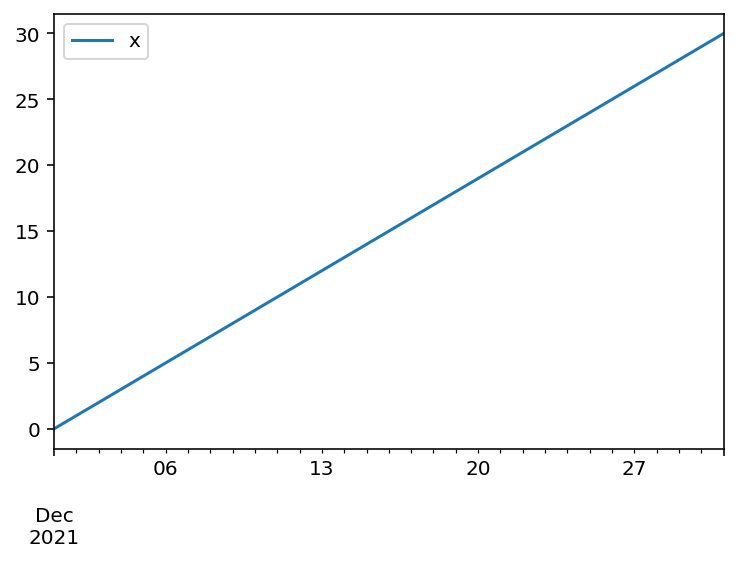

In [31]:
foo  = pd.DataFrame({"x":np.arange(31)}, index=pd.DatetimeIndex(pd.date_range("2021-12-01","2021-12-31")))
foo.plot()
f = plt.gca().xaxis.get_major_formatter()

In [32]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b \'%y')

In [33]:
np.timedelta64(1,"D")

numpy.timedelta64(1,'D')

(19005.0, 20334.436875)

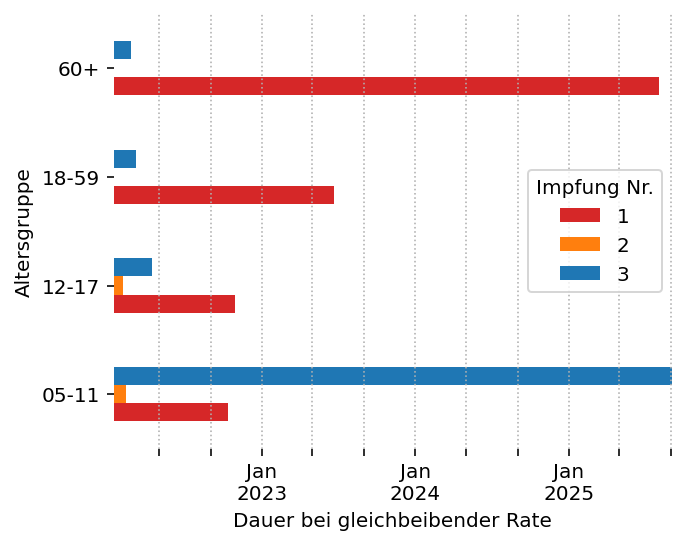

In [34]:
plt.rcParams['figure.facecolor']='white'
b = eta.plot.barh(figsize=(5,4),color=['C3','C1','C0'])
#date = pd.to_datetime(data.Impfdatum.values[-1]).strftime('%d.%m.%y')
plt.xlabel(f"Dauer bei gleichbeibender Rate")
plt.yticks(rotation=0)
plt.xlim((np.datetime64("today"),None))#eta.max().max()))
#plt.xlim((np.datetime64("today"),"2022-12-31"))#eta.max().max()))
plt.axvline(np.datetime64("2022-01-01"), color='gray')
plt.grid(axis='x', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(title="Impfung Nr.")
plt.gca().xaxis.set_major_formatter(f)
plt.xlim((None, eta.loc["60+",1]+np.timedelta64(1,"M")))
#plt.gcf().autofmt_xdate()


In [35]:
missing_rel

Impfschutz,1,2,3
Altersgruppe,,,
05-11,4720539.0,468559.0,139028.0
12-17,1709441.0,272308.0,2015480.0
18-59,8844305.0,0.0,16134814.0
60+,3421866.0,0.0,4970969.0


In [36]:
rate

Impfschutz,1,2,3
Altersgruppe,,,
05-11,0.114179,0.026253,0.000164
12-17,0.617318,0.556358,0.105165
18-59,0.804213,0.804213,0.447034
60+,0.860417,0.860417,0.657645


Text(0.5, 1.0, 'Deutschland')

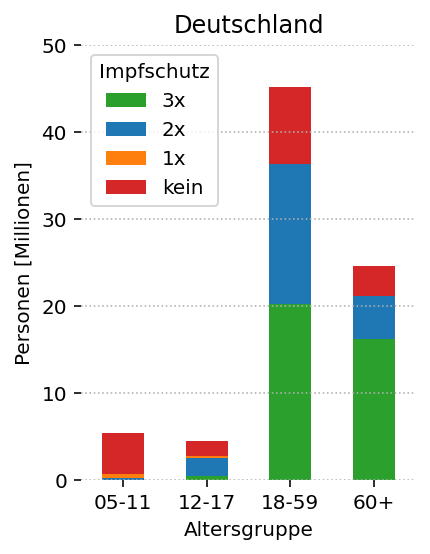

In [37]:
missing_rel.columns = ["kein", "1x", "2x"]
none = rate.loc[:,3] * pop_groups * 1000
none.name = "3x"
dist = pd.concat([missing_rel/1e6, none/1e6], axis=1)
dist.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Personen [Millionen]")
plt.xticks(rotation=0)
plt.ylim((0,50))
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(title = "Impfschutz")
plt.title("Deutschland")

Text(0.5, 1.0, 'Deutschland')

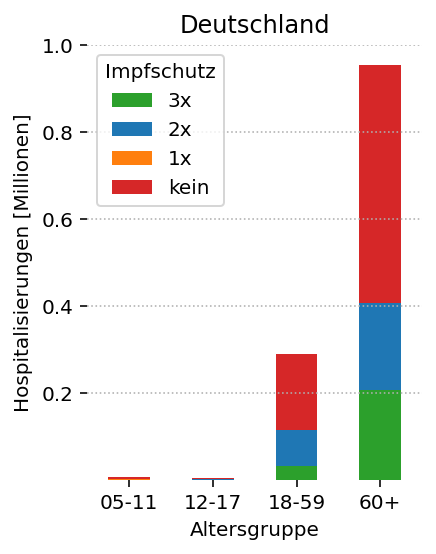

In [38]:
hosp_exp =(dist *  (hr.reshape(-1,1) * np.array([1, 0.5, 0.25, 0.08]).reshape(1,-1)))
hosp_exp.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Hospitalisierungen [Millionen]")
plt.xticks(rotation=0)
#plt.ylim((0,50))
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(title = "Impfschutz")
plt.title("Deutschland")

In [39]:
hosp_exp.sum().sum() * 1000 / pop_groups.sum() 

0.01575581438251724

## England
Daten von NHS England

In [40]:
uk = pd.DataFrame({["1st dose","2nd dose","Booster and 3rd dose","Pop ONS"][i]:\
              pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2022/01/COVID-19-weekly-announced-vaccinations-06-January-2022.xlsx", 
              sheet_name=2 if i < 3 else 21,
              skiprows=[23,35,47,12][i],
              index_col=[1,2],
              nrows=1,
              engine="openpyxl").iloc[:,1:16].T.dropna().rename({'Under 18':'16-17'}).iloc[:,0]\
              for i in range(4)}).fillna(0)

In [41]:
uk

,1st dose,2nd dose,Booster and 3rd dose,Pop ONS
12-15,1413535,0.0,0.0,2677375
16-17,882186,654761.0,39987.0,1241048
18-24,3746219,3299841.0,1320257.0,4709589
25-29,3037115,2753395.0,1234535.0,3771493
30-34,3333457,3076958.0,1580059.0,3824652
35-39,3328606,3133423.0,1807697.0,3738209
40-44,3260068,3116329.0,2050902.0,3476303
45-49,3297320,3189502.0,2310942.0,3638639
50-54,3690505,3602573.0,2924537.0,3875351
55-59,3676585,3606714.0,3072760.0,3761782


In [42]:
uk['factor'] = np.array([0,0,1,1,1,1,1,1,1,1,2,2,2,2,2])

In [43]:
uk_group = uk.groupby('factor').sum(0)
uk_group.index=agg_avg.index[1:]
#uk_group["None"] = uk_group["Pop ONS"] - uk_group["1st dose"]

Text(0.5, 1.0, 'England')

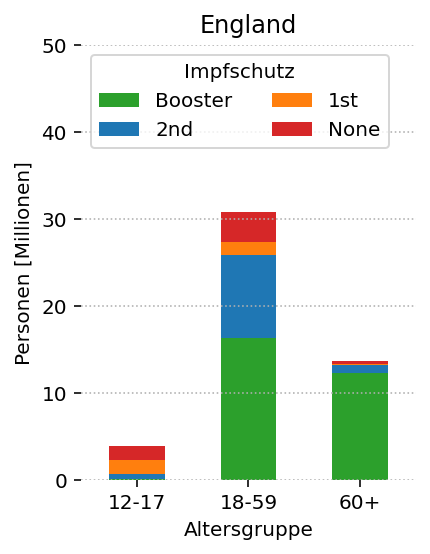

In [44]:
uk_missing = uk_group.iloc[:,:3].copy()
uk_missing["1st dose"] -= uk_missing["2nd dose"]
uk_missing["2nd dose"] -= uk_missing["Booster and 3rd dose"]
uk_missing["None"] = uk_group["Pop ONS"] - uk_group["1st dose"]
uk_missing = uk_missing.rename(columns={x:x.split()[0] for x in uk_missing.columns.values})
uk_dist = (uk_missing.iloc[:,[3,0,1,2]]/1e6)
uk_dist.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Personen [Millionen]")
plt.xticks(rotation=0)
plt.ylim((0,50))
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(loc="upper left", title = "Impfschutz", ncol=2)
plt.title("England")

Text(0.5, 1.0, 'England')

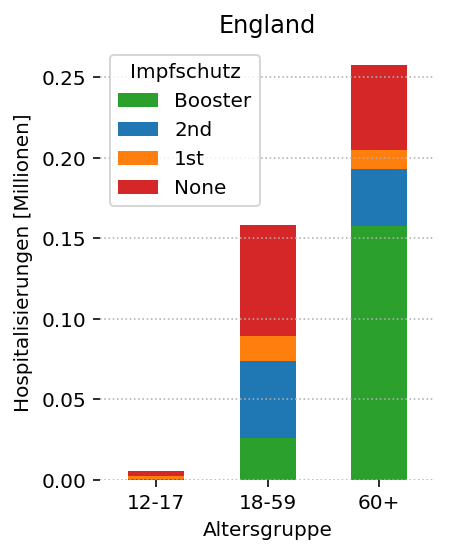

In [45]:
uk_hosp_exp = (uk_dist *  (hr[1:].reshape(-1,1) * np.array([1, 0.5, 0.25, 0.08]).reshape(1,-1)))
uk_hosp_exp.iloc[:,::-1].plot.bar(figsize=(3,4), stacked=True, width=0.5, color=['C3','C1','C0','C2'][::-1])
plt.ylabel(f"Hospitalisierungen [Millionen]")
plt.xticks(rotation=0)
#plt.ylim((0,50))
plt.grid(axis='y', ls=":")
for s in plt.gca().spines.values():
    s.set_visible(False)
plt.legend(title = "Impfschutz")
plt.title("England")

In [46]:
uk_hosp_exp.sum().sum() * 1e6 / uk["Pop ONS"].sum()

0.00869145581297288

## Beobachtete Hospitaliserung England

,00_64,65+
date,,
2020-03-20,221,352
2020-03-21,238,377
2020-03-22,244,458
2020-03-23,356,628
2020-03-24,434,841
...,...,...
2022-01-06,997,1035
2022-01-07,880,892
2022-01-08,904,958


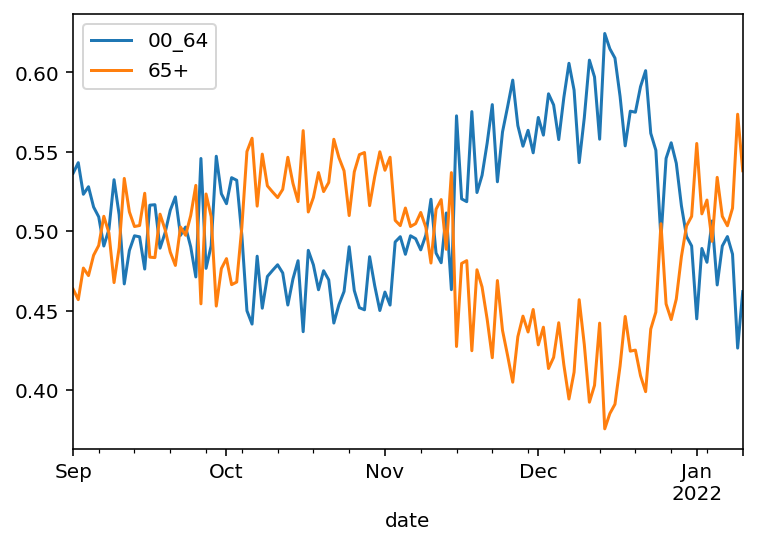

In [47]:
hosp_uk = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv", parse_dates=True).pivot(index="date", columns="age", values="value").iloc[:,[0,3,1,2,4]]
hosp_uk = hosp_uk.iloc[1:,:] - hosp_uk.iloc[:-1,:].values
hosp_uk = pd.DataFrame({"00_64":hosp_uk.iloc[:,:3].sum(1), "65+":hosp_uk.iloc[:,3:].sum(1)}, 
                      index= pd.DatetimeIndex(hosp_uk.index))
(hosp_uk / hosp_uk.sum(1).values[:,np.newaxis]).loc["2021-09-01":].plot()
hosp_uk

In [48]:
cases_uk = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&format=csv", parse_dates=True).pivot(index="date", columns="age", values="cases")[["00_59","60+"]]
cases_uk.index = pd.DatetimeIndex(cases_uk.index)
cases_uk

age,00_59,60+
date,,
2020-01-30,2,0
2020-01-31,0,0
2020-02-01,0,0
2020-02-02,0,0
2020-02-03,0,0
...,...,...
2022-01-03,147234,21905
2022-01-04,178681,26584
2022-01-05,139714,19718


In [49]:
def shift_date_index(df, shift):
    df.index = df.index + shift
    return df

<AxesSubplot:xlabel='date'>

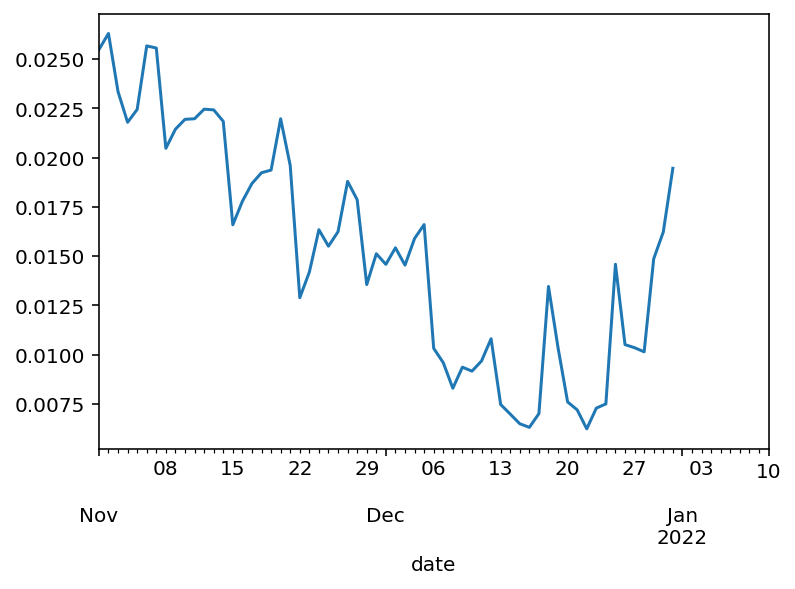

In [50]:
(hosp_uk.sum(1).iloc[7:]/shift_date_index(cases_uk, np.timedelta64(-7,"D")).sum(1)).loc["2021-11-01":].plot()

In [51]:
i = 0
pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2022/01/COVID-19-weekly-announced-vaccinations-06-January-2022.xlsx", 
              sheet_name=2,
              skiprows=[23,35,47][i],
              index_col=[1,2],
              engine="openpyxl").loc["Total4"].iloc[:,1:].T.dropna().rename({'Under 18':'16-17'}).fillna(0)

NHS Region of residence name,NHS Region of residence name,NHS Region of residence name,NHS Region of residence name,NHS Region of residence name,NHS Region of residence name,NHS Region of residence name
